### K neighbors classification

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

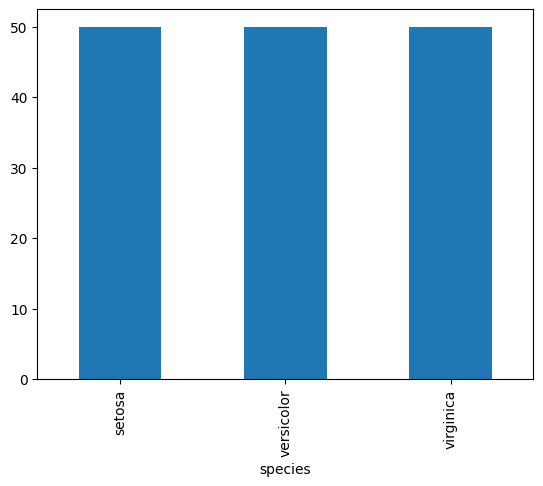

In [7]:
df['species'].value_counts().plot(kind='bar')

### seperate x and y features i.e. dependent and independent features

In [8]:
x = df.drop(columns=['species'])
y = df[['species']]

In [9]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### preprocess x values

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

#### here set_output(transform=pandas) directly converts output into the dataframe format, no need to convert it manually

In [13]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### train test split

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=33, random_state=42)

In [15]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
11,-1.264185,0.788808,-1.226552,-1.315444
42,-1.748856,0.328414,-1.397064,-1.315444
146,0.553333,-1.282963,0.705921,0.922303
51,0.674501,0.328414,0.421734,0.395774
27,-0.779513,1.019004,-1.283389,-1.315444


In [16]:
ytrain.head()

,species
11,setosa
42,setosa
146,virginica
51,versicolor
27,setosa


In [17]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [18]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
11,-1.264185,0.788808,-1.226552,-1.315444
42,-1.748856,0.328414,-1.397064,-1.315444
146,0.553333,-1.282963,0.705921,0.922303
51,0.674501,0.328414,0.421734,0.395774
27,-0.779513,1.019004,-1.283389,-1.315444


In [19]:
xtrain.shape

(117, 4)

In [20]:
xtest.shape

(33, 4)

In [21]:
ytrain.shape

(117, 1)

In [22]:
ytest.shape

(33, 1)

## create a KNN model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=40)
model.fit(xtrain,ytrain)


f:\Wakad 6 to 8 PM\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=40)

In [25]:
model.score(xtrain, ytrain)

0.8632478632478633

In [27]:
model.score(xtest, ytest)

0.9696969696969697

### hyperparameter tuning with grid search cv

In [33]:
params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10]}

In [34]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
gscv = GridSearchCV(knn, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

f:\Wakad 6 to 8 PM\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
f:\Wakad 6 to 8 PM\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
f:\Wakad 6 to 8 PM\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
f:\Wakad 6 to 8 PM\repository\venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

In [35]:
gscv.best_params_

{'n_neighbors': 7}

In [36]:
gscv.best_score_

0.9396700902583255

In [38]:
best_knn = gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=7)

### Evaluate the model

In [41]:
best_knn.score(xtrain,ytrain)

0.9572649572649573

In [42]:
best_knn.score(xtest,ytest)

1.0

### predict y result for train and test data

In [43]:
ypred_tr = best_knn.predict(xtrain)
ypred_ts = best_knn.predict(xtest)

In [44]:
ypred_tr[0:5]

array(['setosa', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [45]:
ytrain.head()

,species
11,setosa
42,setosa
146,virginica
51,versicolor
27,setosa


In [46]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [47]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### create a confusion matrix for predicted values

In [49]:
c = best_knn.classes_
c

array(['setosa', 'versicolor', 'virginica'], dtype=object)

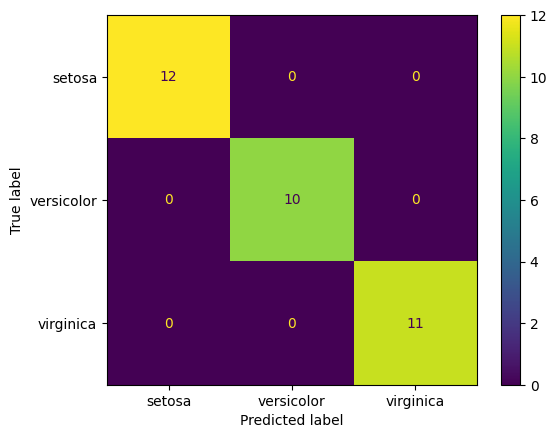

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

#### Chaeck classification report

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



### Predicting out of sample data

In [52]:
xnew = pd.read_csv('iris_sample.csv')
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [53]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [55]:
preds = best_knn.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [56]:
probs = best_knn.predict_proba(xnew_pre)
probs

array([[0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.42857143, 0.57142857],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.14285714, 0.85714286],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.85714286, 0.14285714],
       [0.        , 0.57142857, 0.42857143]])

In [57]:
import numpy as np
max_probs = np.max(probs, axis=1)
max_probs

array([1.        , 1.        , 1.        , 1.        , 0.57142857,
       1.        , 1.        , 0.85714286, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.85714286, 0.57142857])

### Save the predictions , probability in xnew

In [58]:
xnew['species'] = preds
xnew['probability'] = max_probs

In [59]:
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width,species,probability
0,5.5,2.5,4.0,1.3,versicolor,1.000000
1,6.9,3.1,5.1,2.3,virginica,1.000000
2,5.1,2.5,3.0,1.1,versicolor,1.000000
3,4.4,2.9,NaN,0.2,setosa,1.000000
4,5.9,3.0,5.1,1.8,virginica,0.571429


In [60]:
xnew.to_csv('knn_results.csv', index=False)